# Game of Life

### Familiarizing with Numpy

First I want to familiarize with numpy and working with arrays. I know there are ways to index, and select columns. But I'm curious what matrix operations we could do, such as shifting the index by one across an axis. Or how we could leverage transformations using matrix algebra instead of loops.

In [6]:
import numpy as np

import matplotlib.pyplot as plt

In [7]:
A = np.ones((4,4))

A = np.identity(4)
A[1,3] = 1
A[3,2] = 1

A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

Found a way to shift along an axis. This may help find neighbors.

In [8]:
A_1 = np.roll(A, 1, axis=1)
A_1

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.]])

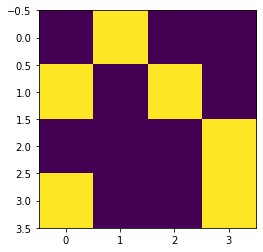

In [9]:
plt.imshow(A_1)

Perhaps taking the difference?

In [41]:
A - A_1

array([[ 1.,  0., -1., -1.],
       [-1.,  1.,  0.,  1.],
       [ 0., -1.,  1., -1.],
       [ 0.,  0.,  0.,  1.]])

In [160]:
((A + A_1) == 2)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True]])

In [165]:
A < A_1

array([[False,  True, False, False],
       [ True, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

So here we have `A`, our original array, and `A_1`, our original array shifted by 1 in the positive direction. So `index=0` becomes `index=1` essentially; as demonstrated below, specifically `[-1,0,1,2]` in `A` is evaluated in comparison to `[0,1,2,3]` in `A_1`.

In [72]:
# Checking to see if
for col in range(A.shape[0]):
    print(A[:,col-1] == A_1[:,col])

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


First we want to count neighbors for each node, regardless if the node we are looking at is alive or dead. We can achieve this, directly by looking in each direction.

Here, `A` represents the living state of each of our `n x m` pixels.
Let, `A1` represent the living state of our neighbor to our left.

$ A[0,0] $  represents the living state of (0,0): alive or dead <br>
$ A1[0,0] $ represents the living state of our (0,-1) neighbor: aliving or dead

In [133]:
A = np.ones((4,4))

A = np.identity(4)
A[1,3] = 1
A[3,2] = 1

A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

In [143]:
A_1 = np.roll(A, 1, axis=1)
A_1

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [144]:
(A<A_1)

array([[False,  True, False, False],
       [ True, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [139]:
~(A>=A_1)

array([[False,  True, False, False],
       [ True, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [136]:
(A>=A_1)

array([[ True, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True,  True, False],
       [False,  True,  True,  True]])

In [124]:
C

array([[False,  True,  True,  True],
       [ True, False,  True, False],
       [ True,  True, False,  True],
       [ True,  True, False,  True]])

In [84]:
C = A + np.roll(A,1,axis=1)
C

array([[1., 1., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 1., 1.],
       [1., 0., 1., 2.]])

Figuring out how many left-right neighbors there are first.

In [130]:
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [148]:
left_neigh = np.ones(A.shape[1])*(A < np.roll(A, 1,axis=1))

right_neigh = np.ones(A.shape[1])*(A < np.roll(A, -1, axis=1))

up_neigh = np.ones(A.shape[1])*(A < np.roll(A, 1, axis=0))

down_neigh = np.ones(A.shape[1])*(A < np.roll(A, -1, axis=0))

In [149]:
left_neigh

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [150]:
down_neigh

array([[0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [151]:
up_neigh

array([[0., 0., 1., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 0., 0.]])

Yup, this is what we're expecting.

In [152]:
sum_neigh = left_neigh + right_neigh + up_neigh + down_neigh

In [153]:
sum_neigh

array([[0., 2., 1., 3.],
       [3., 0., 3., 0.],
       [0., 2., 0., 3.],
       [2., 1., 0., 0.]])

In [154]:
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

Now lets turn it into a function.

In [155]:
def count_neighbors(A):
    ''' This function takes in an array of ones and zeros, 
    and returns an array of the same shape with how many 
    cardinal neighbors each position has.
    '''
    # Determine the number of neighbors in each direction
    left_neigh = np.ones(A.shape[1])*(A < np.roll(A, 1,axis=1))
    right_neigh = np.ones(A.shape[1])*(A < np.roll(A, -1, axis=1))
    up_neigh = np.ones(A.shape[1])*(A < np.roll(A, 1, axis=0))
    down_neigh = np.ones(A.shape[1])*(A < np.roll(A, -1, axis=0))
    
    # Sum them up and return the array
    sum_neigh = left_neigh + right_neigh + up_neigh + down_neigh
    return sum_neigh

In [31]:
def count_neighbors(A):
    ''' This function takes in an array of ones and zeros, 
    and returns an array of the same shape with how many 
    cardinal neighbors each position has.
    '''
    # Determine the number of neighbors in each direction
    left_neigh = np.ones(A.shape[0])*(A < np.roll(A, 1,axis=1))
    right_neigh = np.ones(A.shape[0])*(A < np.roll(A, -1, axis=1))
    up_neigh = np.ones(A.shape[0])*(A < np.roll(A, 1, axis=0))
    down_neigh = np.ones(A.shape[0])*(A < np.roll(A, -1, axis=0))
    
    up_left_neigh = np.ones(A.shape[0])*(A < np.roll(np.roll(B, 1, axis=1), 1, axis=0))
    up_right_neigh = np.ones(A.shape[0])*(A < np.roll(np.roll(B, -1, axis=1), 1, axis=0))
    down_left_neigh = np.ones(A.shape[0])*(A < np.roll(np.roll(B, 1, axis=1), -1, axis=0))
    down_right_neigh = np.ones(A.shape[0])*(A < np.roll(np.roll(B, -1, axis=1), -1, axis=0))
    
    # Sum them up and return the array
    sum_neigh = left_neigh + right_neigh + up_neigh + down_neigh + up_left_neigh + up_right_neigh + down_left_neigh + down_right_neigh
    return sum_neigh

In [214]:
B = count_neighbors(A)

Now we need a function that flips the state of our array based on the input of this array above.

We also need a function that determines which positions will be flipped. But lets first figure out how to handle a boolean array to actually flip it and return the array in it's next step.

In [215]:
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

In [216]:
B

array([[0., 2., 1., 3.],
       [3., 0., 3., 0.],
       [0., 2., 0., 3.],
       [2., 1., 0., 0.]])

In [218]:
# array of booleans for the positions we want to flit


# dead cells
# positions to bring back to life
Birth = ((B == 3) * ~A.astype(bool))

# live positions to kill, too few, or too many neighbors.
Death = ((B < 2) + (B == 4)) * A.astype(bool)
                                       
Flips = Birth + Death

In [219]:
A # Original matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

In [220]:
B # Number of neighbors

array([[0., 2., 1., 3.],
       [3., 0., 3., 0.],
       [0., 2., 0., 3.],
       [2., 1., 0., 0.]])

In [221]:
Birth # Those to be born

array([[False, False, False,  True],
       [ True, False,  True, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [222]:
Death # Those to be killed off

array([[ True, False, False, False],
       [False,  True, False,  True],
       [False, False,  True, False],
       [False, False,  True,  True]])

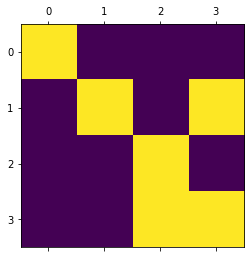

In [313]:
plt.matshow(A)

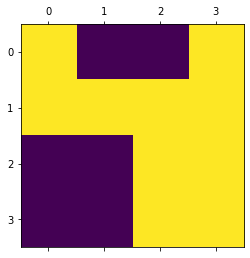

In [314]:
plt.matshow(Flips) # Those to be flipped

In [238]:
A.astype(bool)+Flips # Either alive or needed to be flipped

array([[ True, False, False,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]])

In [239]:
(A.astype(bool)*Flips) # Alive and needing to be flipped

array([[ True, False, False, False],
       [False,  True, False,  True],
       [False, False,  True, False],
       [False, False,  True,  True]])

In [240]:
(~A.astype(bool)*Flips) # Dead and needing to be flipped

array([[False, False, False,  True],
       [ True, False,  True, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [244]:
# (Alive AND not flip) OR (dead AND flip)
(A.astype(bool) * ~Flips) + (~A.astype(bool) * Flips)

array([[False, False, False,  True],
       [ True, False,  True, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [248]:
A_t1 = ((A.astype(bool) * ~Flips) + (~A.astype(bool) * Flips))

In [249]:
A_t1.astype(int)

array([[0, 0, 0, 1],
       [1, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [255]:
def get_new_state(A):
    
    # Get an arry of neighbors
    B = count_neighbors(A)
    
    # dead cells
    # positions to bring back to life
    Birth = ((B == 3) * ~A.astype(bool))

    # live positions to kill, too few, or too many neighbors.
    Death = ((B < 2) + (B == 4)) * A.astype(bool)
    Flips = Birth + Death
    
    # (Alive AND not flip) OR (dead AND flip)
    return ((A.astype(bool) * ~Flips) + (~A.astype(bool) * Flips)).astype(int)

In [256]:
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

In [257]:
B

array([[0., 2., 1., 3.],
       [3., 0., 3., 0.],
       [0., 2., 0., 3.],
       [2., 1., 0., 0.]])

In [259]:
Flips

array([[ True, False, False,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]])

Rules
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

These rules, which compare the behavior of the automaton to real life, can be condensed into the following:

- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. Similarly, all other dead cells stay dead.

In [287]:
    
state_list = [A]
for iteration in range(10):
    state_list.append(get_new_state(state_list[iteration]))

In [290]:
import matplotlib.pyplot as plt  
import matplotlib.animation as animation 

In [316]:
A1 = get_new_state(A)
A2 = get_new_state(A1)
A3 = get_new_state(A2)
A4 = get_new_state(A3)
A5 = get_new_state(A4)


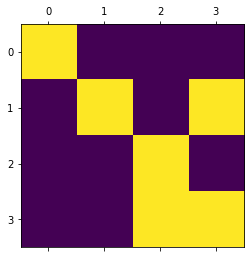

In [325]:
plt.matshow(A)

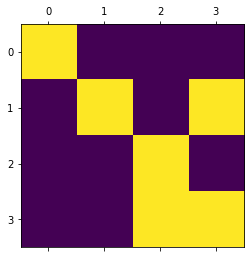

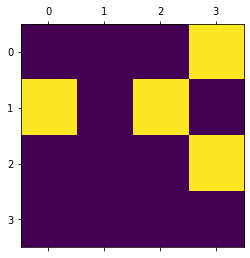

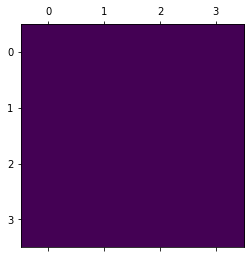

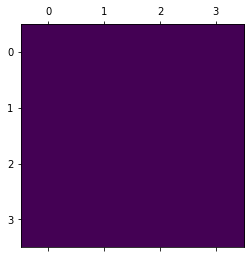

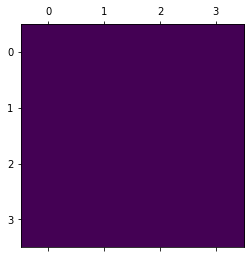

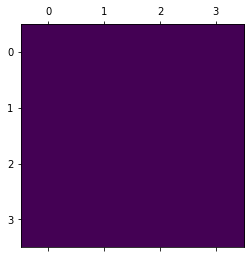

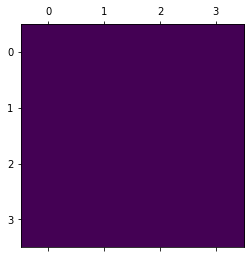

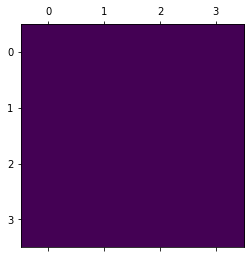

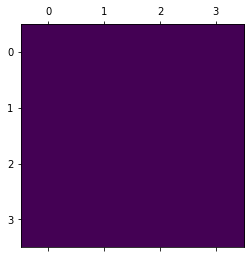

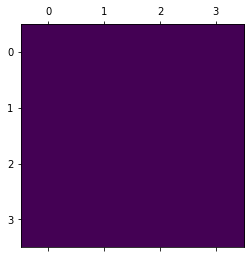

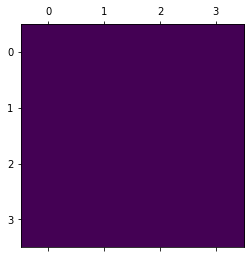

In [311]:
for i in range(len(state_list)):
    plt.matshow(state_list[i])

In [301]:
len(state_list)

11

In [308]:
def update(state_int):
    return plt.matshow(state_list[state_int])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


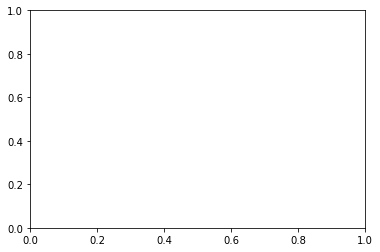

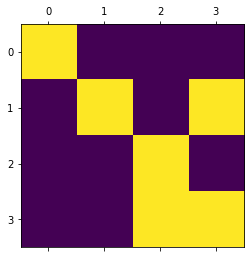

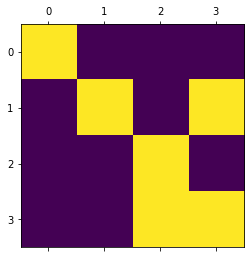

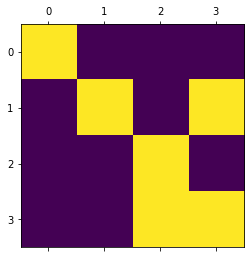

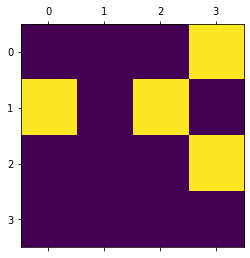

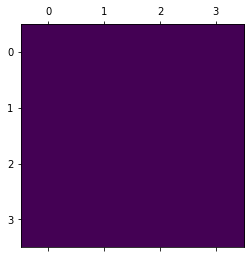

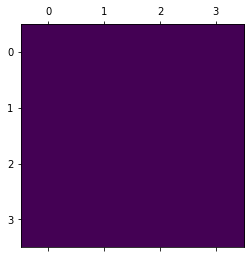

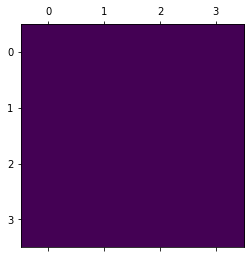

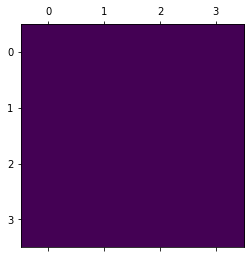

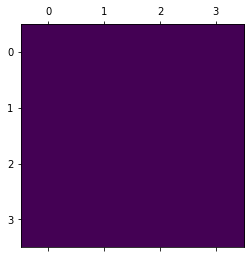

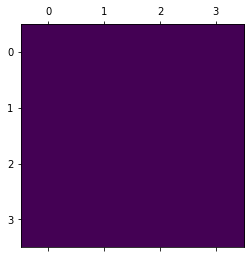

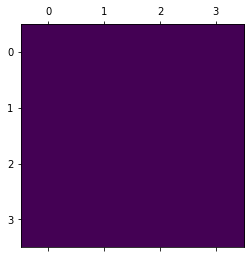

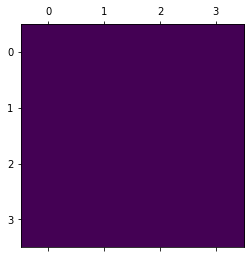

In [310]:
fig, ax = plt.subplots()
ax = plt.matshow(state_list[0])
animation = FuncAnimation(fig, func=update, frames=10)

animation.save('ten_steps.gif')

In [294]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

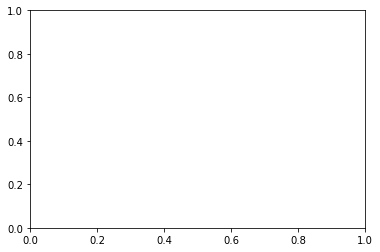

In [296]:
fig, ax = plt.subplots()

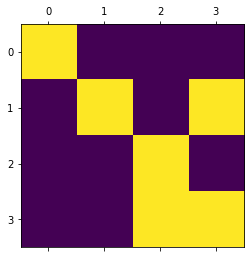

In [298]:
plt.matshow(A)

In [297]:
ax.matshow(A)

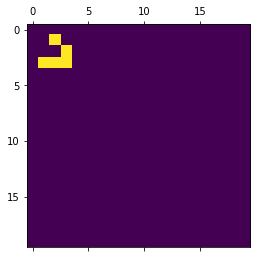

In [26]:
A = np.zeros(shape=(20,20))

A[1,2] = 1
A[2,3] = 1
A[3,1:4]=1


plt.matshow(A)

In [ ]:
    # First add in the first element
    state_list = [A]
    
    # Iterate over the number of frames
    for frame in range(n_frames):
        state_list.append(get_new_state(state_list[frame]))

In [31]:
def run():
    matplotlib.rc('animation', html='jshtml')
    fig, ax = plt.subplots()
    plt.close()
    #ims = onp.random.uniform(0, 1, size=[5, 28, 28])
    ims = state_list #MNIST_IMAGES[:5]
    ims = [[ax.imshow(im, animated=True)] for im in ims]
    anim = matplotlib.animation.ArtistAnimation(fig, ims, interval=200)
    anim.save("glider20x20-50frames.gif", writer='imagemagick')
    return anim
run()

In [ ]:

    
fig = plt.Figure()
#plot = plt.imshow(state_list[0])
ax = plt.axes(xlim=(0, 5), ylim=(0, 5))
plot = ax.imshow(state_list[0], animated = True, vmin=0, vmax=1)


def init():
    plot.set_array(state_list[0])
    return plot

def update(j):
    plot.set_array(state_list[j])
    return [plot]

animation = FuncAnimation(fig, func=update, init_func=init, frames=12, interval = 30)

plt.draw()
plt.show()
animation.save("twelve_steps.gif", writer='imagemagick')

#animation.save("test.mp4")



In [ ]:

state_list = [A]

for i in range(11):
    state_list.append(get_new_state(state_list[i]))

fig = plt.Figure()
#ax = plt.axes(xlim=(0, 5), ylim=(0, 5))
ims = []
    
for i in range(11):
    im = plt.imshow(state_list[i], animated=True)
    ims.append([im])
    
ani = FuncAnimation(fig, ims, frames = 11, interval = 30)

plt.draw()
plt.show()
#my_writer=animation.PillowWriter(fps=20, codec='libx264', bitrate=2)

ani.save("simple.mp4")#, writer='imagemagick')

In [ ]:
a = ims[0][0]

In [ ]:
state_list[0].shape

In [ ]:
f(x,y).shape

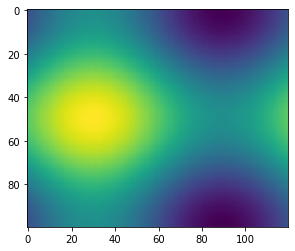

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.gif', writer='imagemagick')

plt.show()

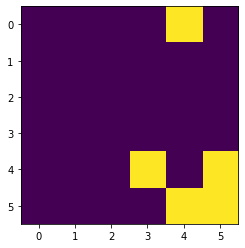

In [9]:
%matplotlib inline

fig = plt.Figure()
state_list = [A]

for i in range(11):
    state_list.append(get_new_state(state_list[i]))


#ax = plt.axes(xlim=(0, 5), ylim=(0, 5))
ims = []

for i in range(10):
    im = plt.imshow(state_list[i], animated=True)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval = 50, blit=True, repeat_delay = 1000)

ani.save("simple.mp4")#, writer='imagemagick')

plt.show()

In [ ]:
a = plt.imshow(state_list[0])

In [ ]:
a

In [ ]:
state_list[0].shape

In [ ]:
f(x,y).shape

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
MNIST_IMAGES = digits.images


In [21]:
import matplotlib

In [25]:
def run():
    matplotlib.rc('animation', html='jshtml')
    fig, ax = plt.subplots()
    plt.close()
    #ims = onp.random.uniform(0, 1, size=[5, 28, 28])
    ims = state_list #MNIST_IMAGES[:5]
    ims = [[ax.imshow(im, animated=True)] for im in ims]
    anim = matplotlib.animation.ArtistAnimation(fig, ims, interval=50)
    anim.save("test_stesps.gif", writer='imagemagick')
    return anim
run()